# importing libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge


# impoorting dataset

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
import pandas as pd
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None, names=columns)
data.head()


--2025-05-15 08:22:30--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.002s  

2025-05-15 08:22:30 (8.99 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# optimizing features with value "0"

In [ ]:
features_with_zeros = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in features_with_zeros:
    data[feature].replace(0, np.nan, inplace=True)

<ipython-input-4-8053eeaa0243>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].replace(0, np.nan, inplace=True)


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


# handling missing data

In [ ]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
data.fillna(data.median(), inplace=True)
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# plotting each feature

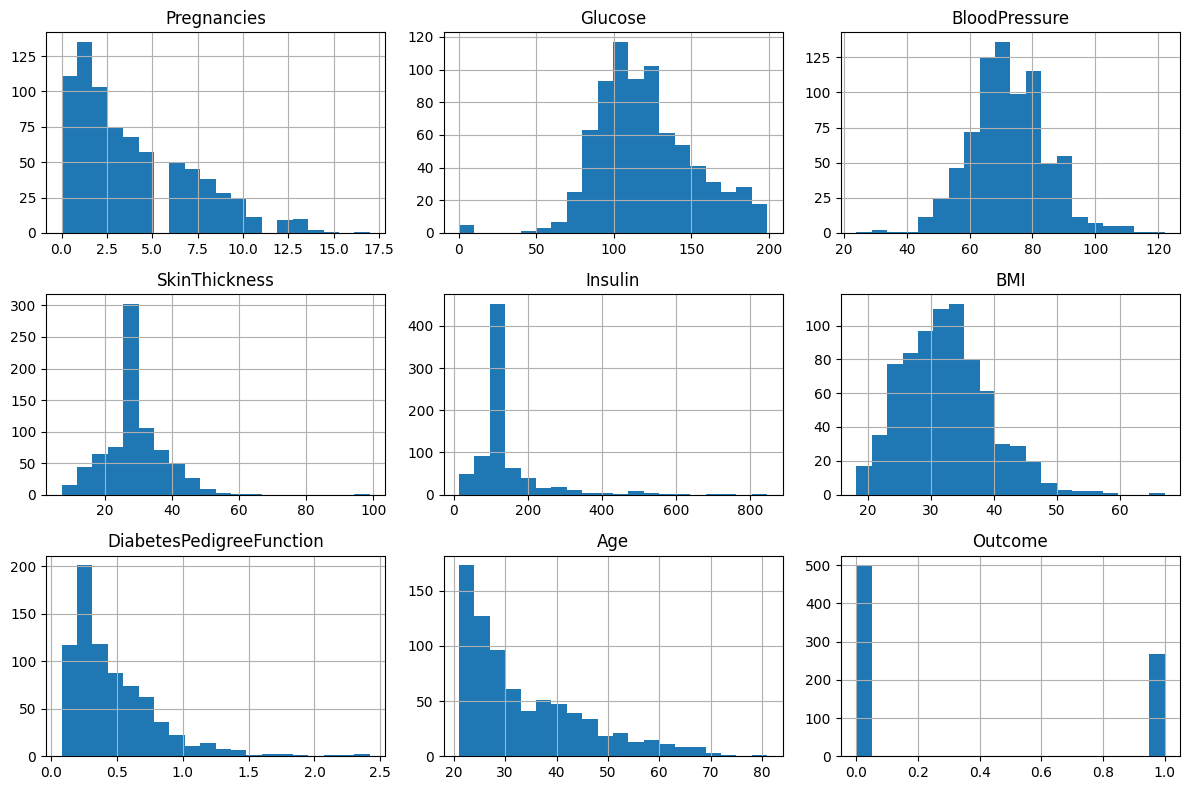

In [ ]:
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


# train test split data and scaling them

In [ ]:
X = data.drop(columns=['Glucose'])
y = data['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# different models

In [ ]:
# @title 1. **Linear Regression**
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


In [ ]:
# @title 2. **Ridge Regression**
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [ ]:
# @title 3. **Lasso Regression**
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)



In [ ]:
# @title 4. **Polynomial Regression**
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
print(X_poly.shape)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
y_pred_poly = poly_reg.predict(poly.transform(X_test_scaled))
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)



(614, 45)


In [ ]:
# @title 5. **KNN Regression**
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

#

In [ ]:

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train.ravel())
y_pred_svr = svr_reg.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)



<ipython-input-16-7bd6ad5c7af4>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_reg.fit(X_train_scaled, y_train.ravel())


In [ ]:
# @title 7. **Decision Tree Regression**
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
y_pred_dt = dt_reg.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)



In [ ]:
# @title 8. **Random Forest Regression**
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# @title 9. **Bayesian Linear Regression**
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_reg.predict(X_test_scaled)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

In [ ]:


# @title 9. **Bayesian Linear Regression**
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_reg.predict(X_test_scaled)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

# evaluation

In [ ]:
# @title **Print the results**
print(f"Linear Regression: MSE={mse_linear:.4f}, R2={r2_linear:.4f}")
print(f"Ridge Regression: MSE={mse_ridge:.4f}, R2={r2_ridge:.4f}")
print(f"Lasso Regression: MSE={mse_lasso:.4f}, R2={r2_lasso:.4f}")
print(f"Polynomial Regression: MSE={mse_poly:.4f}, R2={r2_poly:.4f}")
print(f"KNN Regression: MSE={mse_knn:.4f}, R2={r2_knn:.4f}")
print(f"SVR: MSE={mse_svr:.4f}, R2={r2_svr:.4f}")
print(f"Decision Tree Regression: MSE={mse_dt:.4f}, R2={r2_dt:.4f}")
print(f"Random Forest Regression: MSE={mse_rf:.4f}, R2={r2_rf:.4f}")
print(f"Bayesian Linear Regression: MSE={mse_bayesian:.4f}, R2={r2_bayesian:.4f}")

Linear Regression: MSE=511.9708, R2=0.3832
Ridge Regression: MSE=512.0028, R2=0.3831
Lasso Regression: MSE=512.6320, R2=0.3824
Polynomial Regression: MSE=513.6550, R2=0.3812
KNN Regression: MSE=624.5678, R2=0.2475
SVR: MSE=622.5677, R2=0.2499
Decision Tree Regression: MSE=1263.9156, R2=-0.5227
Random Forest Regression: MSE=617.0863, R2=0.2565
Bayesian Linear Regression: MSE=512.9068, R2=0.3821


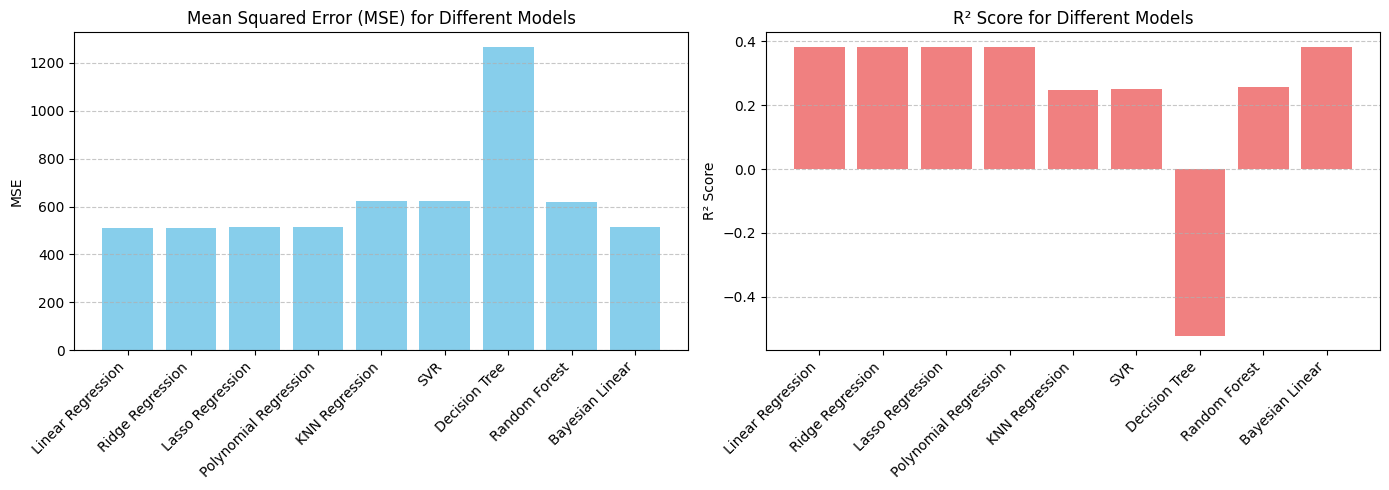

In [ ]:
# Define model names
models = [
    "Linear Regression", "Ridge Regression", "Lasso Regression",
    "Polynomial Regression", "KNN Regression", "SVR",
    "Decision Tree", "Random Forest", "Bayesian Linear"
]

# Define MSE and R² scores for each model
mse_values = [
    mse_linear, mse_ridge, mse_lasso,
    mse_poly, mse_knn, mse_svr,
    mse_dt, mse_rf, mse_bayesian
]

r2_values = [
    r2_linear, r2_ridge, r2_lasso,
    r2_poly, r2_knn, r2_svr,
    r2_dt, r2_rf, r2_bayesian
]

# Set positions for bars
x = np.arange(len(models))

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot MSE bar graph
axes[0].bar(x, mse_values, color='skyblue')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].set_title("Mean Squared Error (MSE) for Different Models")
axes[0].set_ylabel("MSE")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot R² Score bar graph
axes[1].bar(x, r2_values, color='lightcoral')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].set_title("R² Score for Different Models")
axes[1].set_ylabel("R² Score")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show plots
plt.tight_layout()
plt.show()


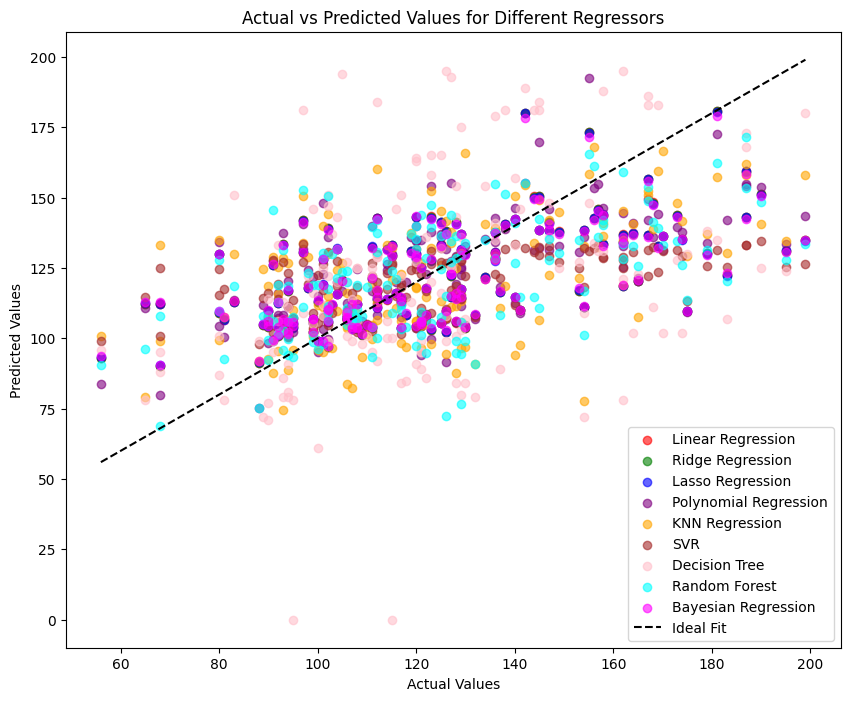

In [ ]:

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'gray', 'yellow']

# Define model names
model_names = [
    "Linear Regression", "Ridge Regression", "Lasso Regression",
    "Polynomial Regression", "KNN Regression", "SVR",
    "Decision Tree", "Random Forest", "Bayesian Regression"
]

# Store predicted values from each model
y_preds = [
    y_pred_linear, y_pred_ridge, y_pred_lasso,
    y_pred_poly, y_pred_knn, y_pred_svr,
    y_pred_dt, y_pred_rf, y_pred_bayesian
]

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 8))
for i, (name, y_pred, color) in enumerate(zip(model_names, y_preds, colors)):
    plt.scatter(y_test, y_pred, color=color, label=name, alpha=0.6)

# Plot the ideal prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label="Ideal Fit")

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Different Regressors')
plt.legend()
plt.show()

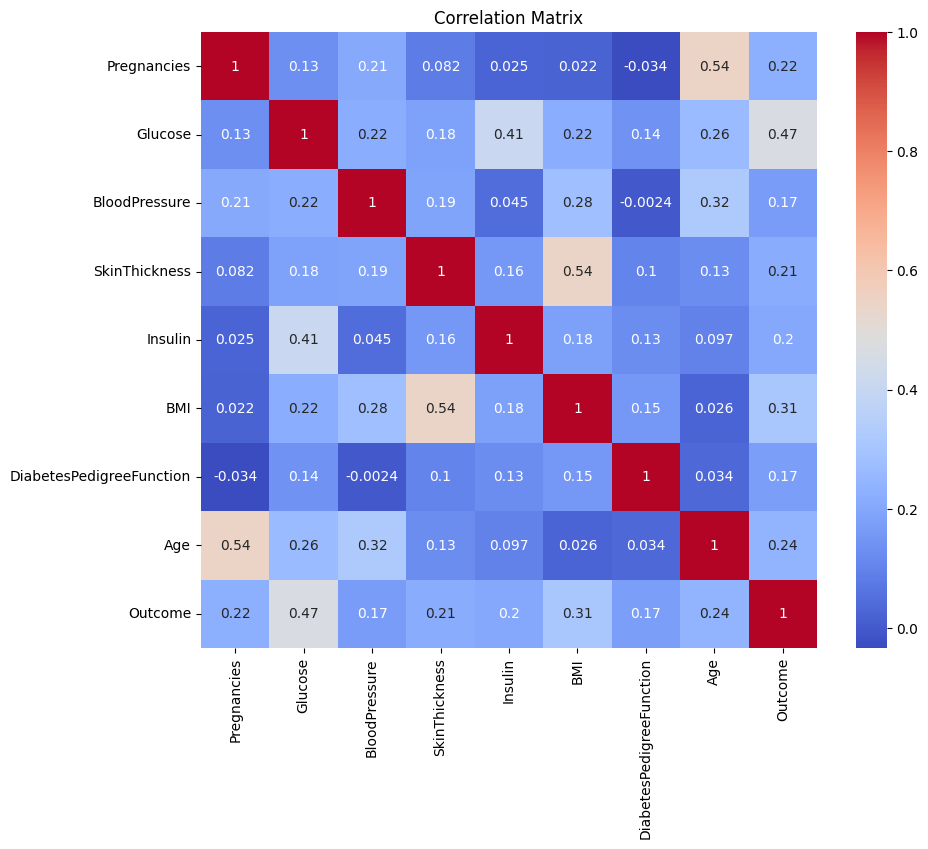

Glucose                     1.000000
Outcome                     0.466581
Insulin                     0.409283
Age                         0.263514
BMI                         0.218487
BloodPressure               0.217870
SkinThickness               0.182037
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
Name: Glucose, dtype: float64


In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# نمایش همبستگی بین ویژگی‌ها و سطح گلوکز
print(correlation_matrix['Glucose'].sort_values(ascending=False))